In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_pickle('C:\\Users\\alessandra.flaccaven\\saved_files\\cleaned_df.pkl')

In [10]:
X_body_text = df['clean_text'].values
X_title_text = df['clean_title'].values
y = df['label'].values

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), max_df= 0.85, min_df= 0.01)

X_body_tfidf = tfidf.fit_transform(X_body_text)
X_title_tfidf = tfidf.fit_transform (X_title_text)


features = X_body_tfidf.toarray()
#labels = df.category_id
features.shape

(466, 5241)

In [54]:
indices = df.index.values

X_body_tfidf_train, X_body_tfidf_test, \
y_body_train, y_body_test, \
indices_body_train, indices_body_test = train_test_split(X_body_tfidf, y, indices, test_size = 0.4, random_state=42)

In [55]:
df.loc[indices_body_train].groupby('label').agg('count')

,link,published,title,text,author,clean_title,clean_text
label,,,,,,,
0,269,269,269,269,269,269,269
1,10,10,10,10,10,10,10


In [56]:
df.loc[indices_body_test].groupby('label').agg('count')

,link,published,title,text,author,clean_title,clean_text
label,,,,,,,
0,177,177,177,177,177,177,177
1,10,10,10,10,10,10,10


In [57]:
nb_body = LinearSVC()

In [58]:
nb_body.fit(X_body_tfidf_train, y_body_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [59]:
y_body_train_pred = nb_body.predict(X_body_tfidf_train)

In [60]:
print('LinearSVC In Sample F1 and Accuracy Scores:')
print('F1 score {:.4}%'.format(f1_score(y_body_train, y_body_train_pred, average='weighted')*100 ))
print ('Accuracy score {:.4}%'.format(accuracy_score(y_body_train, y_body_train_pred)*100))
print('Precision score {:.4}%'.format(precision_score(y_body_train, y_body_train_pred, average='weighted')*100))
print('Recall score {:.4}%'.format(recall_score(y_body_train, y_body_train_pred, average='weighted')*100))

LinearSVC In Sample F1 and Accuracy Scores:
F1 score 100.0%
Accuracy score 100.0%
Precision score 100.0%
Recall score 100.0%


In [61]:
np.where(y_body_train != y_body_train_pred)

(array([], dtype=int32),)

In [62]:
y_body_pred = nb_body.predict(X_body_tfidf_test)

In [63]:
# print metrics
print('Naive Bayes F1 and Accuracy Scores:')
print('F1 score {:.4}%'.format(f1_score(y_body_test, y_body_pred, average='weighted')*100 ))
print ('Accuracy score {:.4}%'.format(accuracy_score(y_body_test, y_body_pred)*100))
print('Precision score {:.4}%'.format(precision_score(y_body_test, y_body_pred, average='weighted')*100))
print('Recall score {:.4}%'.format(recall_score(y_body_test, y_body_pred, average='weighted')*100))

Naive Bayes F1 and Accuracy Scores:
F1 score 95.29%
Accuracy score 96.26%
Precision score 96.4%
Recall score 96.26%


In [64]:
np.where(y_body_test != y_body_pred)

(array([  3,  50,  62,  79,  99, 108, 184], dtype=int32),)

In [29]:
df.loc[[3, 57, 50, 62, 79]]

,link,published,title,text,author,label,clean_title,clean_text
3,https://www.nytimes.com/2020/02/11/business/me...,2020-02-11T21:42:23,T-Mobile and Sprint Are Cleared to Merge as th...,"“Today was a huge victory for this merger,” Jo...",[Edmund Lee],0,t mobile sprint cleared merge big get bigger,"""today huge victory merger"" john legere chief ..."
57,https://www.nytimes.com/2020/02/06/science/chr...,2020-02-10T19:44:07,"Christina Koch Lands on Earth, and Crosses a T...",How many astronauts can you name without consu...,[Mary Robinette Kowal],0,christina koch lands earth crosses threshold w...,many astronauts name without consuing google w...
50,https://www.nytimes.com/2020/02/11/science/tyr...,2020-02-11T19:49:26,Canada’s Newest Tyrannosaur Is Named for a ‘Re...,Alberta is a tyrannosaur graveyard. There rest...,[Nicholas St. Fleur],0,canadas newest tyrannosaur named reaper death,alberta tyrannosaur graveyard rest great carni...
62,https://www.nytimes.com/2020/02/11/world/asia/...,2020-02-12T05:29:04,"A Store, a Chalet, an Unsealed Pipe: Coronavir...","The new coronavirus, though most serious in Ch...","[Vivian Wang, Austin Ramzy, Megan Specia]",0,store chalet unsealed pipe coronavirus hot spo...,"new coronavirus though serious china ""holds gr..."
79,https://www.nytimes.com/2020/02/08/world/asia/...,2020-02-10T17:05:13,Where’s Xi? China’s Leader Commands Coronaviru...,"“Xi’s grip on power is not light,” said Jude B...","[Chris Buckley, Steven Lee Myers]",0,wheres xi? chinas leader commands coronavirus ...,"""xis grip power light"" said jude blanchette fr..."


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alessandra.flaccaven\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


[('market', 367), ('report', 128), ('``', 94), ("''", 92), ('global', 84), ('pv', 56), ('box', 55), ('junction', 54), ('vaccines', 54), ('foot', 52), ('mouth', 52), ('disease', 52), ('industry', 50), ('phytosterols', 50), ('baby', 50), ('monitor', 50), ('well', 48), ('wheelchair', 47), ('stair', 47), ('climber', 47), ('analysis', 45), ('product', 44), ('key', 43), ('microtomes', 43), ('players', 42), ('sales', 42), ('based', 41), ('also', 39), ('growth', 39), ('regions', 39), ('type', 38), ('2017', 37), ('chemical', 37), ('fire', 36), ('tank', 36), ('best', 35), ('storage', 35), ('part', 34), ('sprinkler', 34), ('rodenticides', 33), ('information', 32), ('us', 32), ('the', 32), ('revenue', 32), ('heads', 32), ('ammonium', 30), ('sulphate', 30), ('share', 29), ('iran', 27), ('time', 26)]


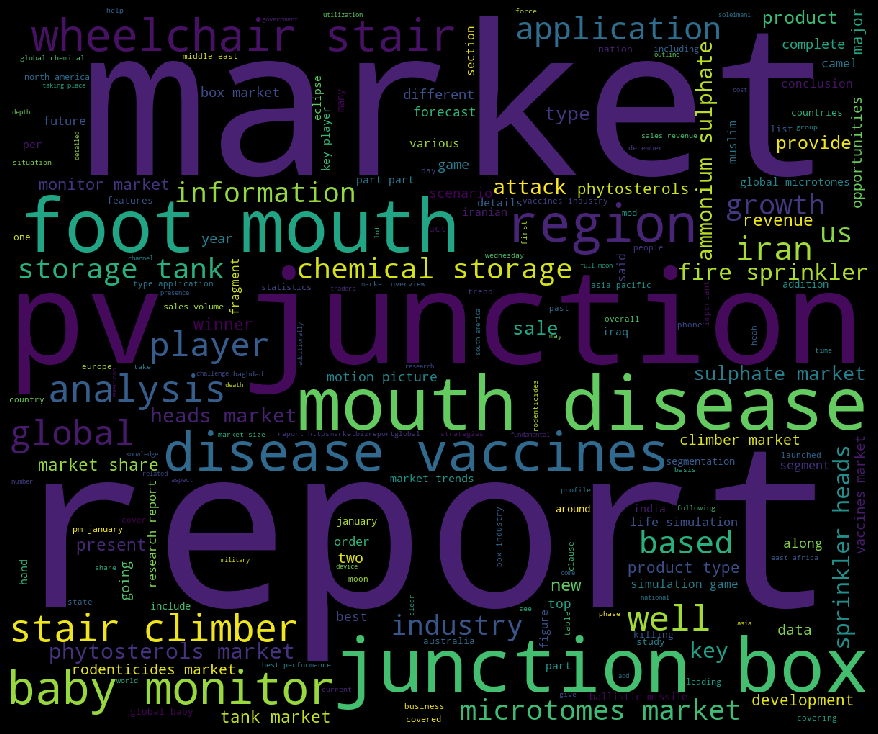

In [30]:
#Spam words and wordcloud

spam = df[df['label']==1]

import nltk
nltk.download('punkt')

spam_words = nltk.word_tokenize(" ".join(spam['clean_text'].values.tolist()))
spam_counter = Counter(spam_words)
print(spam_counter.most_common(50))
spam_wordcloud = WordCloud(width=1200, height=1000, random_state = 42).generate(" ".join(spam_words))
# wordcloud2 = WordCloud(width=1200, height=1000, collocations = False).generate(" ".join(spam_words)) # to turn off bigrams

fig = plt.figure(figsize=(20,10), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()